In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=5
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: {{DOCSTRING}}

The following function is already defined in the library HF.py. So you don't need to defined them if you need them.

def flattened(ham: np.ndarray, N_flavor, N_k: int):
    """Flattens a Hamiltonian or expectation value tensor from high-rank to rank-3.

    Args:
      ham: Hamiltonian or expectation value tensor with shape (*N_flavor, *N_flavor, N_k).
      N_flavor: Tuple or

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me analyze the Hamiltonian equation provided and answer the questions step by step.

### Step 1: Understanding the Hamiltonian

This is a Hamiltonian for a three-orbital model with p_x, p_y, and d orbitals. The Hamiltonian is expressed in second quantization form. 

First, I'll identify the key components:

1. The Hamiltonian is defined as:
   $\HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)$

2. $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ - This is a vector of creation operators for the three orbitals (p_x, p_y, and d) with momentum k and spin s.

3. $\HH_{\kk s}$ is a 3×3 matrix with elements that depend on model parameters and momentum k.

4. $f(n^{p}, \eta)$ is a function of the total p-orbital density and a nematic order parameter.

### QUESTION 1: Dimension and Basis Order

From the Hamiltonian, I can id

In [7]:
print(generated_code['thinking'])

Let me analyze the Hamiltonian equation provided and answer the questions step by step.

### Step 1: Understanding the Hamiltonian

This is a Hamiltonian for a three-orbital model with p_x, p_y, and d orbitals. The Hamiltonian is expressed in second quantization form. 

First, I'll identify the key components:

1. The Hamiltonian is defined as:
   $\HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)$

2. $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ - This is a vector of creation operators for the three orbitals (p_x, p_y, and d) with momentum k and spin s.

3. $\HH_{\kk s}$ is a 3×3 matrix with elements that depend on model parameters and momentum k.

4. $f(n^{p}, \eta)$ is a function of the total p-orbital density and a nematic order parameter.

### QUESTION 1: Dimension and Basis Order

From the Hamiltonian, I can identify the following:
- The model includes three orbi

In [8]:
print(generated_code['text'])

# Analyzing the Three-Orbital Model Hamiltonian

1) Number of Flavors, D = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

2) EXP-VAL DEPENDENT TERMS: {
    "n^p": "Total density of holes on oxygen sites (p_x and p_y orbitals). Computed as sum of p_x and p_y occupations across all spins",
    "eta": "Nematic order parameter. Computed as the difference between p_x and p_y occupations across all spins"
}

TERMS:
  - xi_x term on diagonal H[s, 0, s, 0, k] -> Interacting, depends on n^p and eta
  - xi_y term on diagonal H[s, 1, s, 1, k] -> Interacting, depends on n^p and eta
  - xi_d term on diagonal H[s, 2, s, 2, k] -> Interacting, depends on n and n^p
  - gamma_2(k) term off-diagonal H[s, 0, s, 1, k] and H[s, 1, s, 0, k] -> Non-interacting
  - gamma_1(k_x) term off-diagonal H[s, 0, s, 2, k] and H[s, 2, s, 0, k] -> Non-interacting
  - gamma_1(k_y) term off-diagonal H[s, 1, s, 2, k] and H[s, 2, s, 1, k] -> Non-interacting
  - f(n^p, eta) -> Interacting constant

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """A class representing the Hartree-Fock Hamiltonian for a three-orbital (p_x, p_y, d) model on a square lattice.
    
    This class implements the mean-field Hamiltonian for a model with p_x, p_y, and d orbitals,
    with both non-interacting hopping terms and interacting terms dependent on orbital occupations.
    
    Args:
        N_shell (int, optional): Number of shells in the Brillouin zone. Default is 3.
        parameters (dict, optional): Dictionary of model parameters. Defaults include:
            't_pd': Copper-oxygen hopping parameter
            't_pp': Oxygen-oxygen hopping parameter
            'Delta': Energy difference between p and d orbitals
            'U_p': On-site interaction for p orbitals
            'V_pp': Nearest-neighbor p-p interaction
            'V_pd': Nearest-neighbor p-d interaction
            'U_d': On-site interaction for d orbitals
            'n': Tot

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_5.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

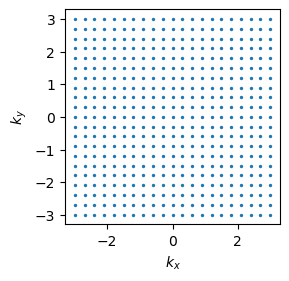

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

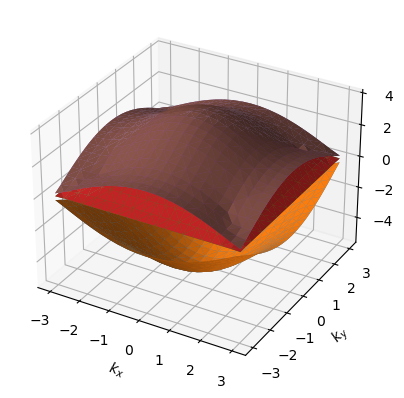

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

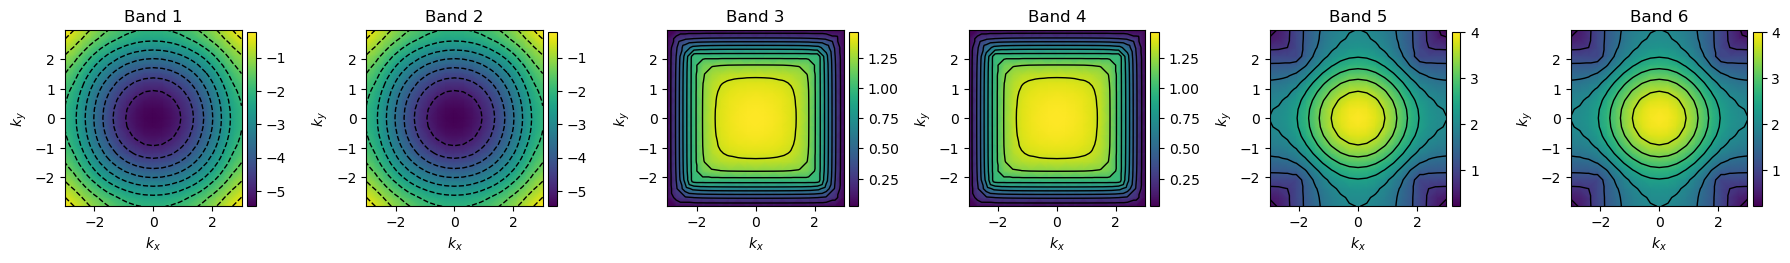

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 3


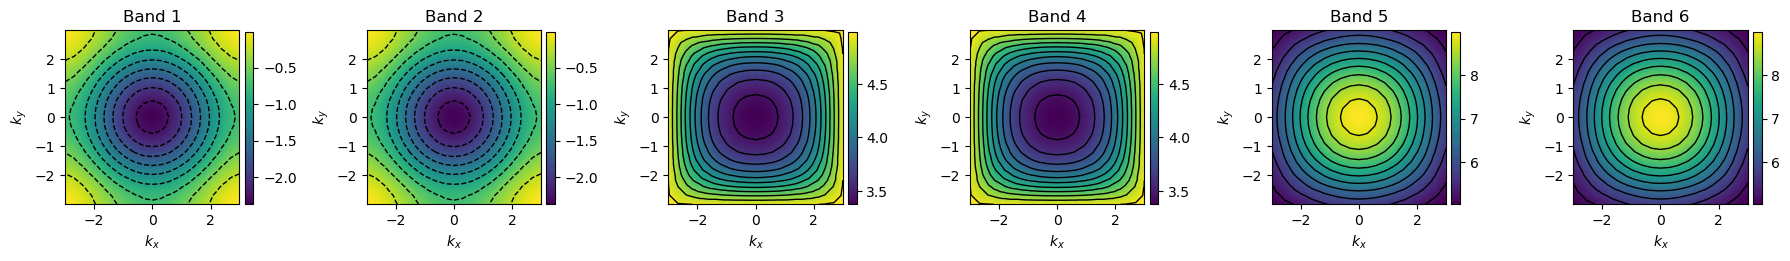

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

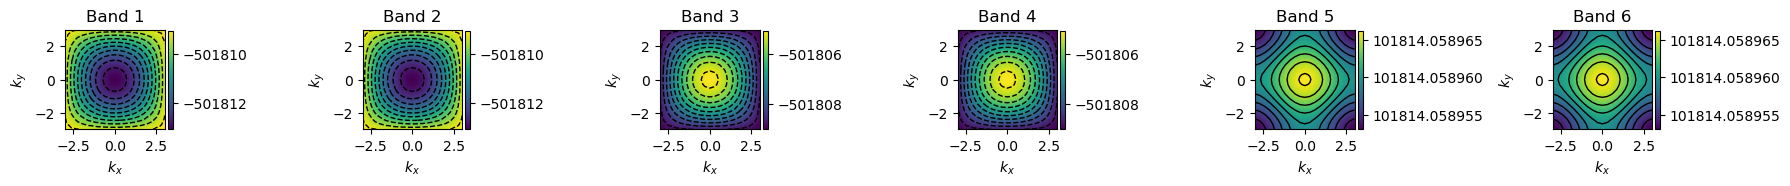

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 0.04
U/T is 79378.74
mean_U is 36805.46


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and the rubric to determine if the image shows the correct momentum space mesh in the first Brillouin zone with the correct point group symmetry.

The image shows:
- A 2D grid of points in k-space
- The x-axis is labeled as k_x, ranging approximately from -3 to 3
- The y-axis is labeled as k_y, ranging approximately from -3 to 3
- The points form a square grid with uniform spacing
- The grid covers a square region, which appears to be the first Brillouin zone

According to the problem:
- The system is defined on a square lattice
- The Hamiltonian is written in momentum space with operators labeled by momentum k
- The momentum dependence appears in the matrix elements γ₁(k_i) and γ₂(k)

For a square lattice, the first Brillouin zone should be a square in momentum space, typically ranging from -π to π in both k_x and k_y directions (or sometimes from 0 to 2π, depending on convention).

The point group symmetry 

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image based on the provided rubric.

The image shows 6 false color plots (labeled "Band 1" through "Band 6") of what appears to be energy bands in the first Brillouin zone of a square lattice. Each plot shows contour lines and a color scale indicating energy values.

Let's go through the rubric requirements:

1. **Shape of the Brillouin zone boundary**: 
   The plots show a square region with k_x and k_y axes ranging from approximately -3 to 3. The Brillouin zone for a square lattice should indeed be square, so this matches the expected shape.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions (yellow)**:
   - Bands 1 & 2: The highest energy (yellow) is at the corners of the shown region
   - Bands 3 & 4: The highest energy (yellow) is in a square/rectangular region in the center
   - Bands 5 & 6: The highest energy (yellow) is in a circular region in the center

   2.2 **Pattern of energ

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

Let's analyze the image according to the rubric:

1. **Identify the shape of the Brillouin zone boundary**:
   Looking at all six band plots, I can see that the axes are labeled kx and ky, and range from approximately -2 to +2 in both directions. The plot boundaries form a square, which is consistent with the expected Brillouin zone for a square lattice. So this point is correct.

2. **Examine the symmetry of the energy distribution**:

   2.1 **Identify the highest energy regions (yellow)**:
   - In Bands 1 & 2: The highest energy (yellow) regions are at the corners of the Brillouin zone
   - In Bands 3 & 4: The highest energy regions are also at the corners
   - In Bands 5 & 6: The highest energy (yellow) regions are at the center (0,0)

   2.2 **Trace the pattern of energy variation across the zone**:
   - Bands 1 & 2: Circular contours with lowest energy at center, highest at corners
   - Bands 3 & 4: More square-like contours wi

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me analyze the image according to the rubric to determine whether this is a correct display of the interacting-renormalized band structure in the first Brillouin zone after self-consistent Hartree-Fock calculation.

1. Identifying the Brillouin zone boundary:
The image shows 6 panels (Band 1 through Band 6), each displaying a square region with k_x and k_y axes ranging from approximately -2.5 to 2.5. This square-shaped region is consistent with the first Brillouin zone of a square lattice, which should indeed be square-shaped. So this aspect appears correct.

2. Examining the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- For Bands 1-2: The highest energy regions appear to be at the corners of the displayed zone
- For Bands 3-4: The highest energy regions appear to be circular/ring-like around the center
- For Bands 5-6: The highest energy regions appear to be circular/ring-like around the center

2.

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '5' saved to final_answer.yaml
